In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#to loaddataset
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
#check for dtypes
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
#check for shape
df.shape

(768, 9)

In [5]:
#check for null value percentage
df.isnull().sum()/df.shape[0]*100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

<Axes: >

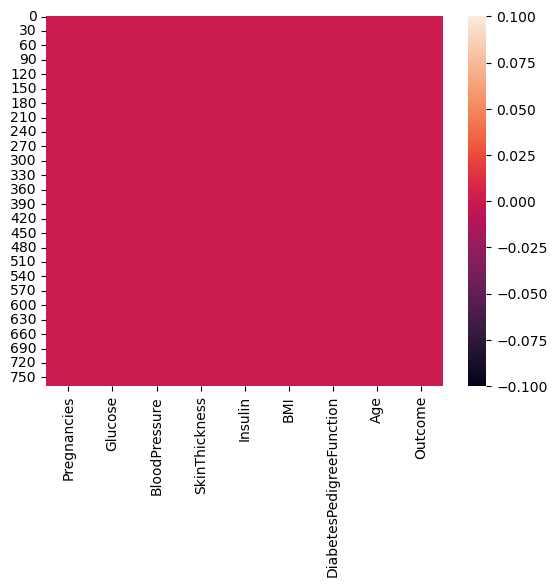

In [6]:
#visualised null value throught heatmap
sb.heatmap(df.isnull())

In [7]:
#duplicated value finding
df.duplicated().sum()

0

In [8]:
#X is input and output column
X=df.drop('Outcome',axis=1) #input 
Y=df['Outcome'] #outpu

In [9]:
#train Test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [10]:
X_train.shape

(537, 8)

In [11]:
Y_train.shape

(537,)

In [12]:
X_test.shape

(231, 8)

In [13]:
Y_test.shape

(231,)

In [14]:
#we use standardScaler
X_train.shape,X_test.shape

((537, 8), (231, 8))

In [15]:
#create object for StandardScaling
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)


In [16]:
X_train

array([[ 3.3536084 ,  0.48047259,  0.05216975, ...,  0.68611992,
        -0.94690147,  0.81020454],
       [-1.12101735, -0.76891126, -0.2463932 , ...,  0.64699564,
         0.39612987, -0.69526203],
       [-0.82270897, -0.16023707,  0.05216975, ..., -0.5788985 ,
        -0.7936697 , -1.02981015],
       ...,
       [ 2.75699163,  0.16011776,  1.04737957, ...,  1.50772982,
         0.34505262,  0.72656751],
       [ 0.07221618,  1.60171451,  0.15169073, ...,  1.53381267,
         0.03258   , -0.611625  ],
       [ 1.5637581 , -0.60873384,  0.3507327 , ...,  0.13837998,
         0.59142526,  1.06111563]])

In [17]:
X_test

array([[ 0.96714133,  0.48047259,  0.25121172, ..., -0.76147848,
         0.53734346,  1.47930079],
       [-0.82270897,  0.96100484, -0.44543516, ..., -0.74843705,
        -0.86878331, -0.94617312],
       [ 0.66883295, -0.38448546, -0.44543516, ..., -0.89189275,
        -0.78766061, -0.52798796],
       ...,
       [-0.82270897, -0.96112415, -0.74399811, ..., -0.8658099 ,
        -0.70353337, -0.86253609],
       [ 1.86206648,  1.50560806,  0.25121172, ...,  0.80349276,
         0.20684358,  0.05747126],
       [ 1.5637581 , -0.28837901,  0.64929565, ...,  0.30791853,
        -0.62541522,  0.22474532]])

In [18]:
#using logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
#lets train the model with 70% of data

#we use .fit() method of logisticRegression class
lr.fit(X_train,Y_train)

LogisticRegression()

In [19]:
#testing  the model with 30% of data
y_pred=lr.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [20]:
#creating dictonary to understand the data
dict={"Acutal op":Y_test,"Predict op":y_pred}
df11=pd.DataFrame(dict)
df11

,Acutal op,Predict op
285,0,0
101,0,0
581,0,0
352,0,0
726,0,0
...,...,...
241,0,0
599,0,0
650,0,0
11,1,1


In [21]:
lr.score(X_test,Y_test)

0.7835497835497836

In [22]:
#creatin  a confusion matrix
from sklearn.metrics import confusion_matrix

In [23]:
print(confusion_matrix(Y_test,y_pred))

[[132  14]
 [ 36  49]]


In [24]:
# Recall=Tp/(TP+FN)
#precision =TP/(TP+FP)

In [25]:
#creat a classification report  for the above problemf
from sklearn.metrics import classification_report


In [26]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



In [27]:
#calling DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier

In [28]:

# for i in range(1,101):
#     dtc=DecisionTreeClassifier(random_state=i)
#     dtc.fit(X_train,Y_train)
#     y_pred=dtc.predict(X_test)
#     print("random_state",i)
#     print(classification_report(Y_test,y_pred))
#     print(confusion_matrix(Y_test,y_pred))

In [29]:
#creating function inside which all function method has been called in a single line
def create_model(model):
    model.fit(X_train,Y_train)
    ypred=model.predict(X_test)
    print(classification_report(Y_test,ypred))
    print(confusion_matrix(Y_test,ypred))
    return model

In [30]:
for i in range(1,101):
    dtc=DecisionTreeClassifier(random_state=i)
    print('Random state',i)
    dtc=create_model(dtc)

Random state 1
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       146
           1       0.60      0.51      0.55        85

    accuracy                           0.69       231
   macro avg       0.67      0.65      0.66       231
weighted avg       0.68      0.69      0.69       231

[[117  29]
 [ 42  43]]
Random state 2
              precision    recall  f1-score   support

           0       0.76      0.79      0.78       146
           1       0.62      0.56      0.59        85

    accuracy                           0.71       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.71      0.71      0.71       231

[[116  30]
 [ 37  48]]
Random state 3
              precision    recall  f1-score   support

           0       0.74      0.82      0.78       146
           1       0.62      0.51      0.56        85

    accuracy                           0.71       231
   macro avg       0.68      0.66    

              precision    recall  f1-score   support

           0       0.73      0.80      0.76       146
           1       0.59      0.49      0.54        85

    accuracy                           0.69       231
   macro avg       0.66      0.65      0.65       231
weighted avg       0.68      0.69      0.68       231

[[117  29]
 [ 43  42]]
Random state 27
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       146
           1       0.60      0.49      0.54        85

    accuracy                           0.69       231
   macro avg       0.67      0.65      0.66       231
weighted avg       0.68      0.69      0.69       231

[[118  28]
 [ 43  42]]
Random state 28
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       146
           1       0.63      0.55      0.59        85

    accuracy                           0.71       231
   macro avg       0.69      0.68      0.68       

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       146
           1       0.60      0.51      0.55        85

    accuracy                           0.69       231
   macro avg       0.67      0.65      0.66       231
weighted avg       0.68      0.69      0.69       231

[[117  29]
 [ 42  43]]
Random state 58
              precision    recall  f1-score   support

           0       0.74      0.82      0.78       146
           1       0.61      0.51      0.55        85

    accuracy                           0.70       231
   macro avg       0.68      0.66      0.67       231
weighted avg       0.69      0.70      0.69       231

[[119  27]
 [ 42  43]]
Random state 59
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       146
           1       0.62      0.54      0.58        85

    accuracy                           0.71       231
   macro avg       0.69      0.67      0.68       

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       146
           1       0.60      0.49      0.54        85

    accuracy                           0.69       231
   macro avg       0.67      0.65      0.66       231
weighted avg       0.68      0.69      0.69       231

[[118  28]
 [ 43  42]]
Random state 85
              precision    recall  f1-score   support

           0       0.74      0.77      0.76       146
           1       0.58      0.53      0.55        85

    accuracy                           0.68       231
   macro avg       0.66      0.65      0.65       231
weighted avg       0.68      0.68      0.68       231

[[113  33]
 [ 40  45]]
Random state 86
              precision    recall  f1-score   support

           0       0.73      0.82      0.77       146
           1       0.61      0.48      0.54        85

    accuracy                           0.70       231
   macro avg       0.67      0.65      0.66       

In [31]:
#create object for Decision Tree classifier
# dtc=DecisionTreeClassifier(random_state=79)

In [32]:
# #creat a dictanary   it show much informatin has each column has
dict1={"featrues":X.columns,'Informatin gain':dtc.feature_importances_}
df11=pd.DataFrame(dict1)
df11


,featrues,Informatin gain
0,Pregnancies,0.046001
1,Glucose,0.276220
2,BloodPressure,0.156388
3,SkinThickness,0.066556
4,Insulin,0.033293
5,BMI,0.189084
6,DiabetesPedigreeFunction,0.111823
7,Age,0.120636


In [33]:
#to overcome overfit we have 2 pruning technique
#1 Max_depth
#2 min_samples_leaf

In [61]:
#using max depth
# 1.max_depth: inbuilt parameter of decision tree classifier class(minlen=1 and maxlen=8)
# for i in range(1,9):
#     dtc1=DecisionTreeClassifier(random_state=lr.random_state,max_depth=i)
#     print("Max depth",i)
#     dtc1=create_model(dtc1)

In [62]:
#picking up maxdepth 5 from it 
dtc1=DecisionTreeClassifier(random_state=lr.random_state,max_depth=5)
dtc1=create_model(dtc1)

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       146
           1       0.72      0.68      0.70        85

    accuracy                           0.78       231
   macro avg       0.77      0.76      0.76       231
weighted avg       0.78      0.78      0.78       231

[[123  23]
 [ 27  58]]


In [58]:
#accucary is 77% recall is 0.64%

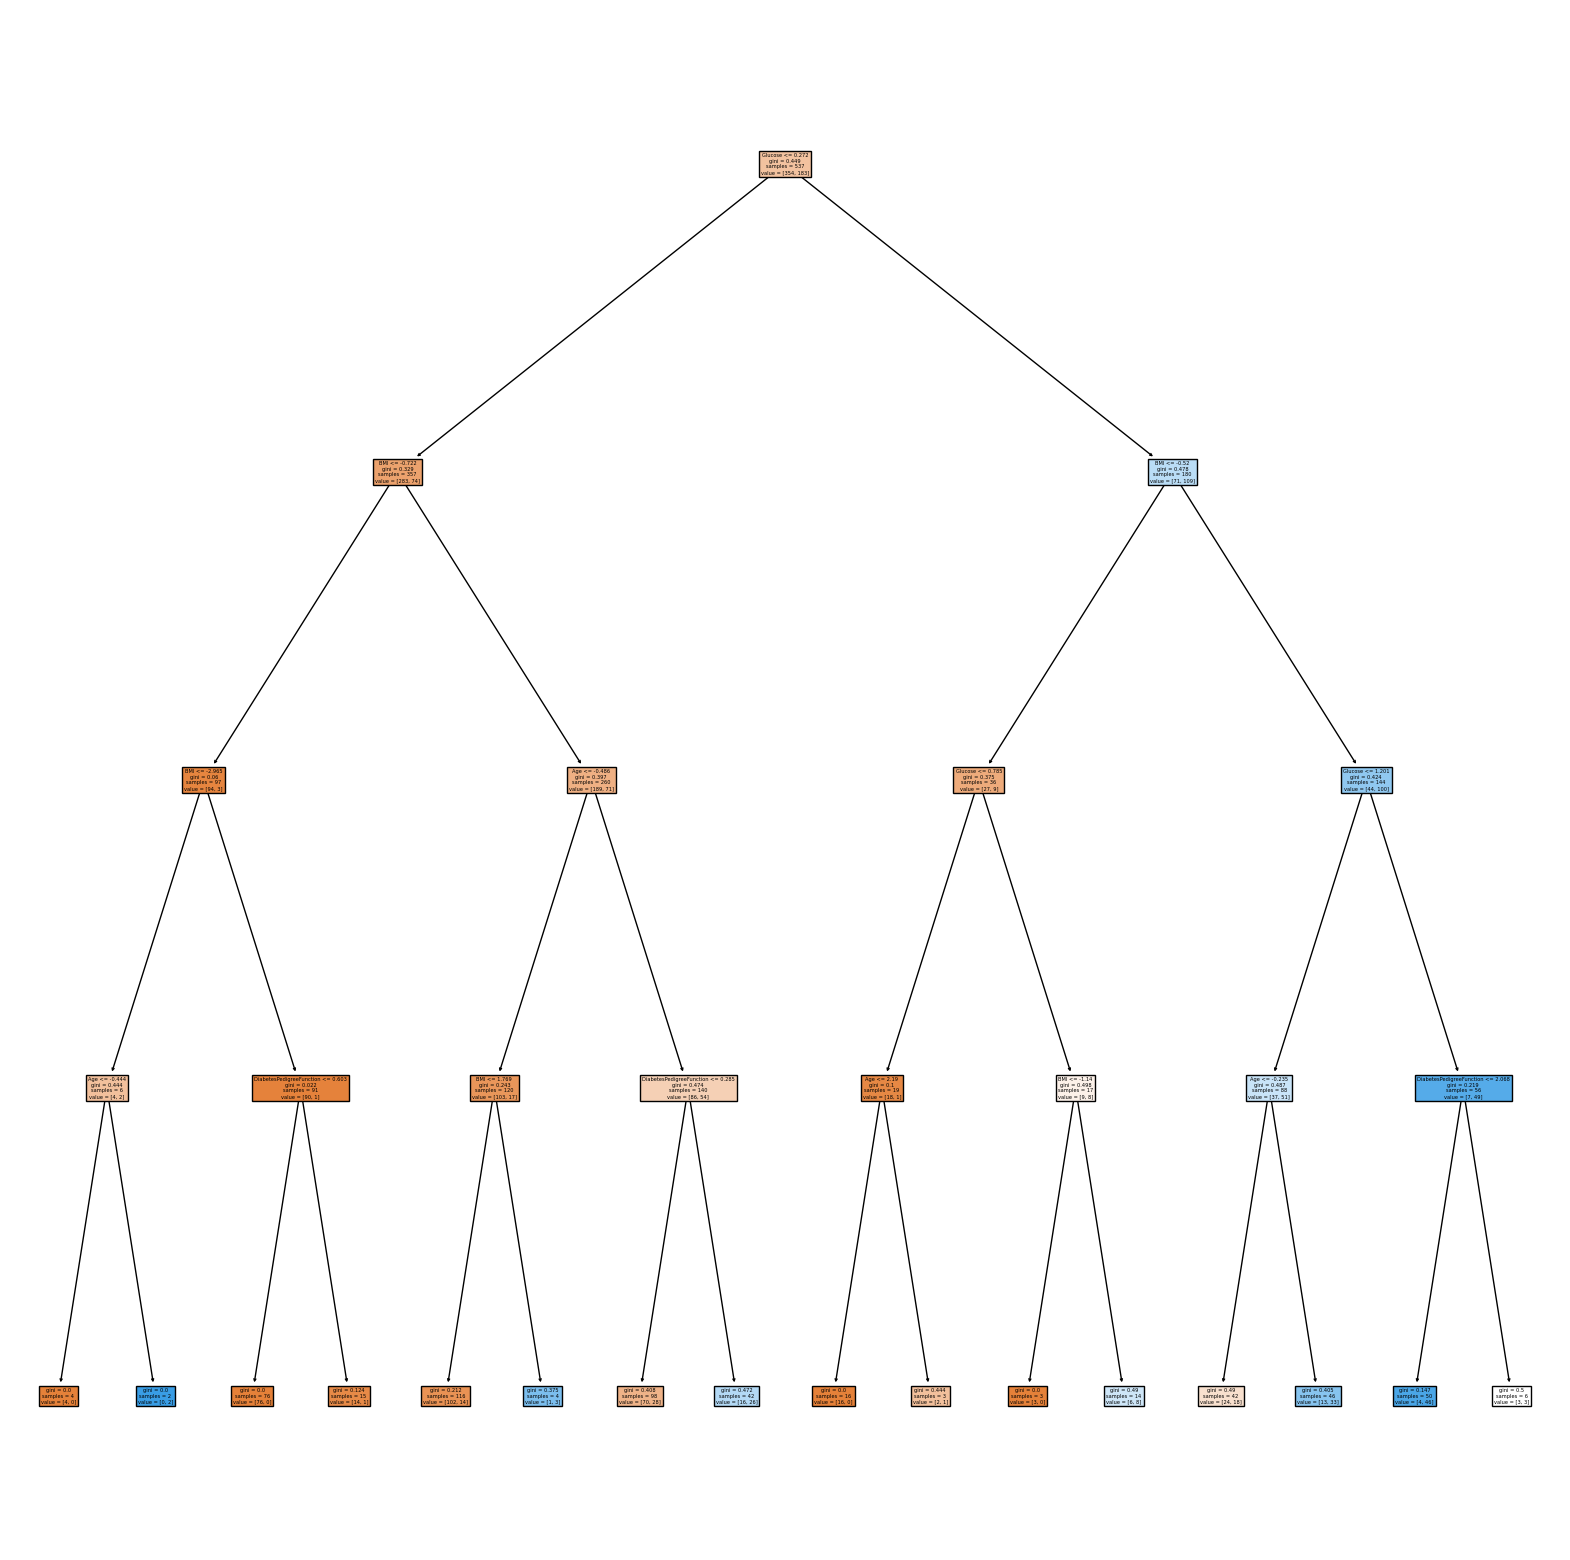

In [37]:
#creating a tree
from sklearn import tree
features=X.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dtc1,feature_names=features,filled=True)

In [38]:
#it shows which type of important features have taken 
dict1={"Features":X.columns,'Information_Gain':dtc1.feature_importances_}


df2=pd.DataFrame(dict1)
df2

,Features,Information_Gain
0,Pregnancies,0.000000
1,Glucose,0.491858
2,BloodPressure,0.000000
3,SkinThickness,0.000000
4,Insulin,0.000000
5,BMI,0.266536
6,DiabetesPedigreeFunction,0.089179
7,Age,0.152427


In [39]:
#using min samples leaf 

In [75]:
for i in range(45,101):
    dtc2=DecisionTreeClassifier(random_state=lr.random_state,min_samples_leaf=i)
    dtc2=create_model(dtc2)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       146
           1       0.74      0.71      0.72        85

    accuracy                           0.80       231
   macro avg       0.79      0.78      0.78       231
weighted avg       0.80      0.80      0.80       231

[[125  21]
 [ 25  60]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       146
           1       0.72      0.71      0.71        85

    accuracy                           0.79       231
   macro avg       0.78      0.77      0.78       231
weighted avg       0.79      0.79      0.79       231

[[123  23]
 [ 25  60]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       146
           1       0.71      0.71      0.71        85

    accuracy                           0.79       231
   macro avg       0.77      0.77      0.77       231
weighted avg       0.79     

              precision    recall  f1-score   support

           0       0.71      0.93      0.81       146
           1       0.75      0.35      0.48        85

    accuracy                           0.72       231
   macro avg       0.73      0.64      0.64       231
weighted avg       0.73      0.72      0.69       231

[[136  10]
 [ 55  30]]
              precision    recall  f1-score   support

           0       0.71      0.93      0.81       146
           1       0.75      0.35      0.48        85

    accuracy                           0.72       231
   macro avg       0.73      0.64      0.64       231
weighted avg       0.73      0.72      0.69       231

[[136  10]
 [ 55  30]]
              precision    recall  f1-score   support

           0       0.71      0.93      0.81       146
           1       0.75      0.35      0.48        85

    accuracy                           0.72       231
   macro avg       0.73      0.64      0.64       231
weighted avg       0.73     

In [76]:
#taking min samples leaf =45 
#   2.min_samples_leaf:inbuilt parameter of decision tree classifier class(minlen=45 and maxlen=100)
dtc2=DecisionTreeClassifier(random_state=lr.random_state,min_samples_leaf=45)
dtc2=create_model(dtc2)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       146
           1       0.74      0.71      0.72        85

    accuracy                           0.80       231
   macro avg       0.79      0.78      0.78       231
weighted avg       0.80      0.80      0.80       231

[[125  21]
 [ 25  60]]


In [70]:
#accuarcy increases by 80 percent ,recall is 71%

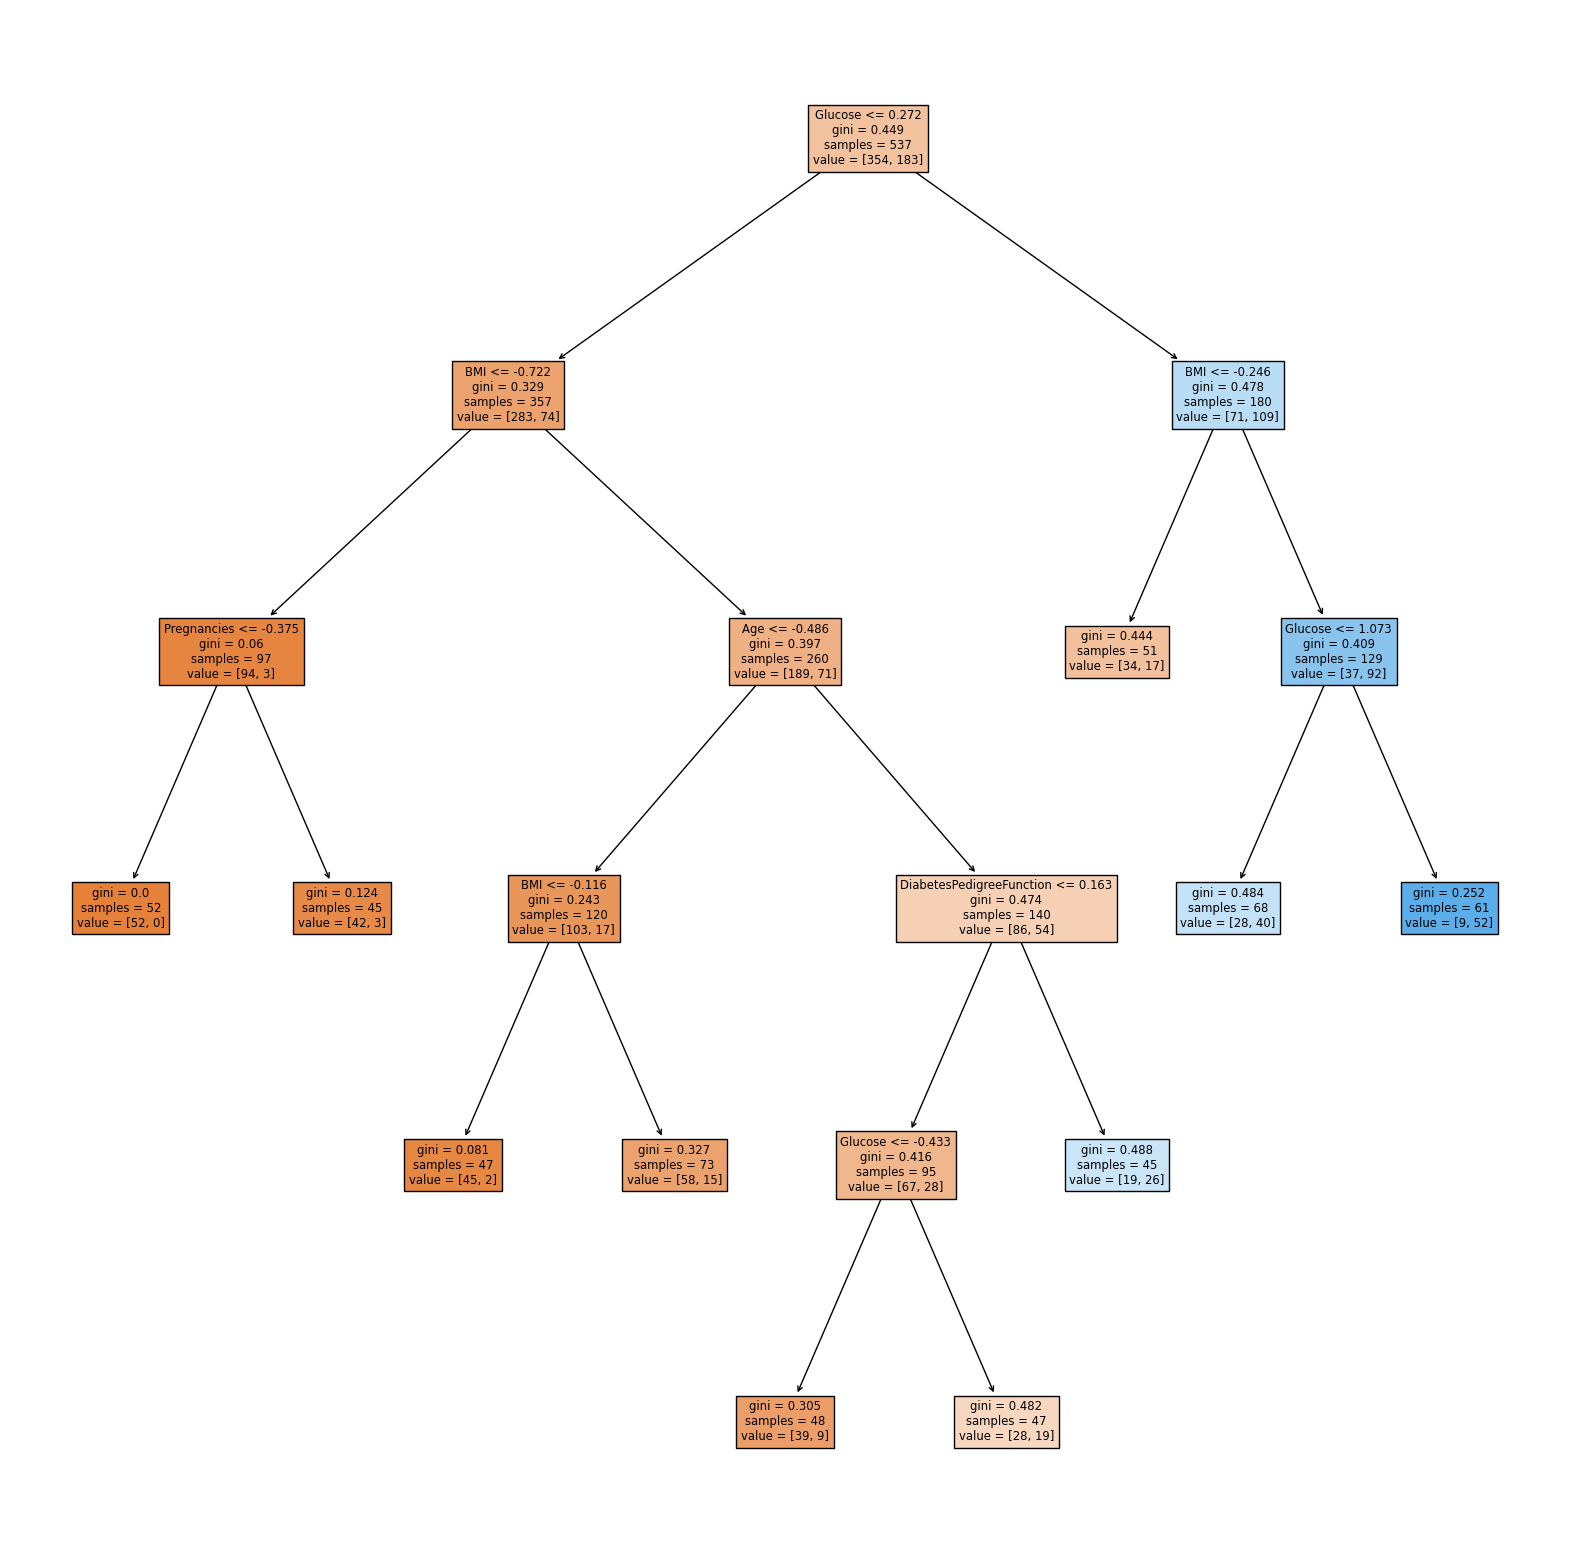

In [43]:
#creating tree using
from sklearn import tree
features=X.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dtc2,feature_names=features,filled=True)

In [44]:
# model accuracy increase to 80% percent and recall value to 71%
# model is 80% percent accurate

In [45]:
#ensemble techinque
#ensemble technique:- train the dataset with mutliple algorithms and taking the combined score of all algorithms
#bagging:- no of possibilities it will work on every possibility ,once the data is used it will use it again
##pasting it does not work on every possibililties ,once the data is used it is not used again

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rfc=RandomForestClassifier()


In [77]:
for i in range(1,17):
    rfc=RandomForestClassifier(max_features=i,random_state=lr.random_state)
    print('Max feature',i)
    rfc=create_model(rfc)

Max feature 1
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       146
           1       0.78      0.61      0.68        85

    accuracy                           0.79       231
   macro avg       0.79      0.75      0.76       231
weighted avg       0.79      0.79      0.79       231

[[131  15]
 [ 33  52]]
Max feature 2
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       146
           1       0.79      0.62      0.70        85

    accuracy                           0.80       231
   macro avg       0.80      0.76      0.77       231
weighted avg       0.80      0.80      0.79       231

[[132  14]
 [ 32  53]]
Max feature 3
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       146
           1       0.75      0.62      0.68        85

    accuracy                           0.78       231
   macro avg       0.77      0.75      0

In [78]:
#By using random forest algorithm the decisionTree higeshest accuary is 83 but recall it quit less which is 61 

In [80]:
from sklearn.ensemble import AdaBoostClassifier

In [83]:
for i in range(1,17):
    ada=AdaBoostClassifier(random_state=1,n_estimators=i)
    print("n_estimators",i)
    ada=create_model(ada)

n_estimators 1
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       146
           1       0.68      0.62      0.65        85

    accuracy                           0.75       231
   macro avg       0.74      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231

[[121  25]
 [ 32  53]]
n_estimators 2
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       146
           1       0.72      0.58      0.64        85

    accuracy                           0.76       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.76      0.76       231

[[127  19]
 [ 36  49]]
n_estimators 3
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       146
           1       0.72      0.55      0.63        85

    accuracy                           0.76       231
   macro avg       0.75      0.71    